# Step 1: Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split


In [2]:
# Importing Heart Disease Dataset
data = pd.read_csv("heart_disease_dataset.csv")

In [29]:
# Check for missing values
data.isnull().sum()

# If missing values exist, you can fill them using appropriate techniques
# For example, fill missing numerical values with the mean
data.fillna(data.mean(), inplace=True)

# Alternatively, you can drop rows with missing values
data.dropna(inplace=True)


In [30]:
# Identify categorical columns
categorical_cols = []

# Encode categorical columns using label encoding
label_encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])


# Step 2: Exploratory Data Analysis (EDA)


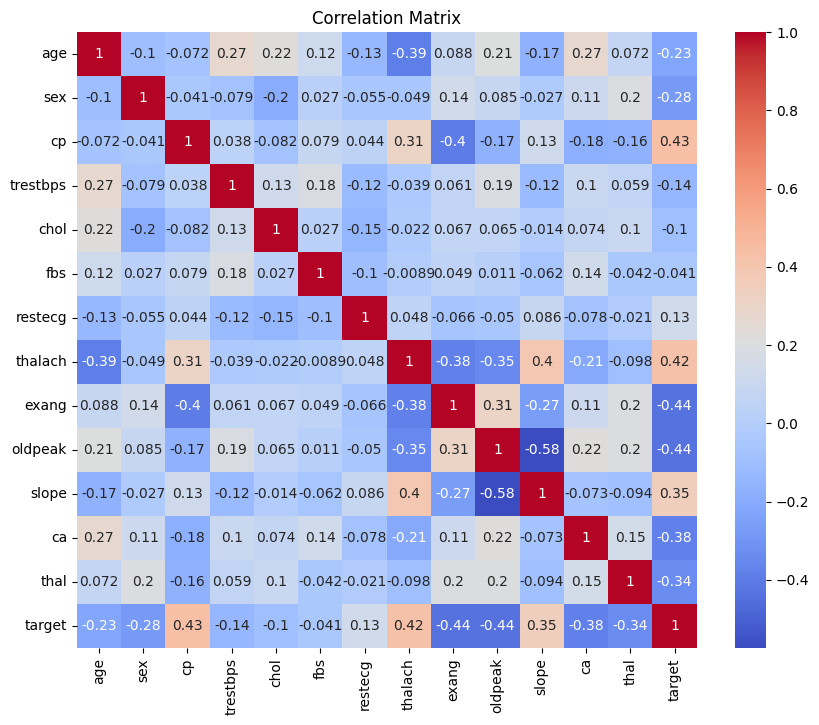

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


# Step 3: Model Implementation

In [14]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


In [15]:
X = data.drop('target', axis=1)  # Features
y = data['target']               # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [17]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [18]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

# Step 4: Model Evaluation

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [20]:
# SVM model evaluation
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred)
svm_recall = recall_score(y_test, svm_pred)
svm_f1 = f1_score(y_test, svm_pred)
svm_confusion = confusion_matrix(y_test, svm_pred)

# Random Forest model evaluation
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
rf_confusion = confusion_matrix(y_test, rf_pred)

# Decision Tree model evaluation
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred)
dt_recall = recall_score(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred)
dt_confusion = confusion_matrix(y_test, dt_pred)

# Step 5: Cross Validation and Overfitting Check

In [21]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on each model
svm_scores = cross_val_score(svm_model, X, y, cv=10)
rf_scores = cross_val_score(rf_model, X, y, cv=10)
dt_scores = cross_val_score(dt_model, X, y, cv=10)

# Calculate mean accuracy scores
svm_mean_accuracy = svm_scores.mean()
rf_mean_accuracy = rf_scores.mean()
dt_mean_accuracy = dt_scores.mean()

# Check for overfitting by comparing training and testing accuracies
svm_train_accuracy = svm_model.score(X_train, y_train)
rf_train_accuracy = rf_model.score(X_train, y_train)
dt_train_accuracy = dt_model.score(X_train, y_train)

In [28]:
print(svm_mean_accuracy)
print(rf_mean_accuracy)
print(dt_mean_accuracy)

0.6897011231677138
0.9970588235294118
0.9970873786407767


# Step 6: Plot The Results

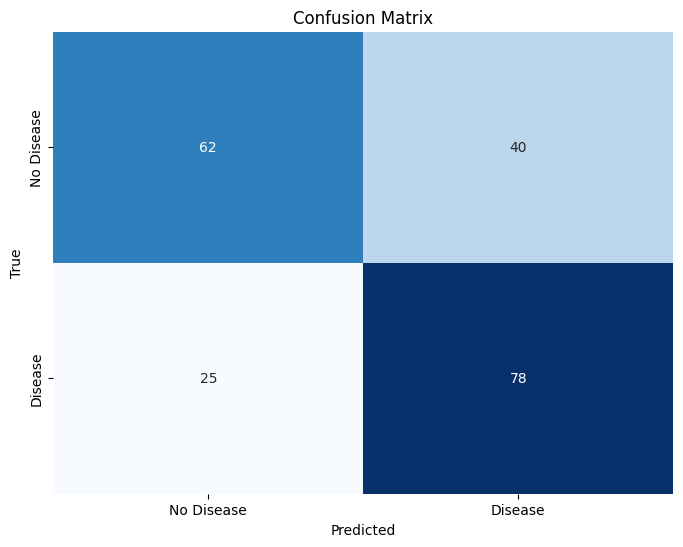

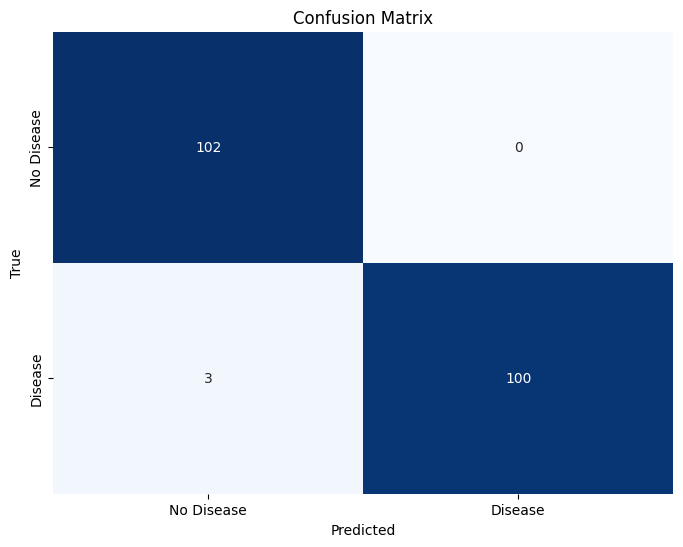

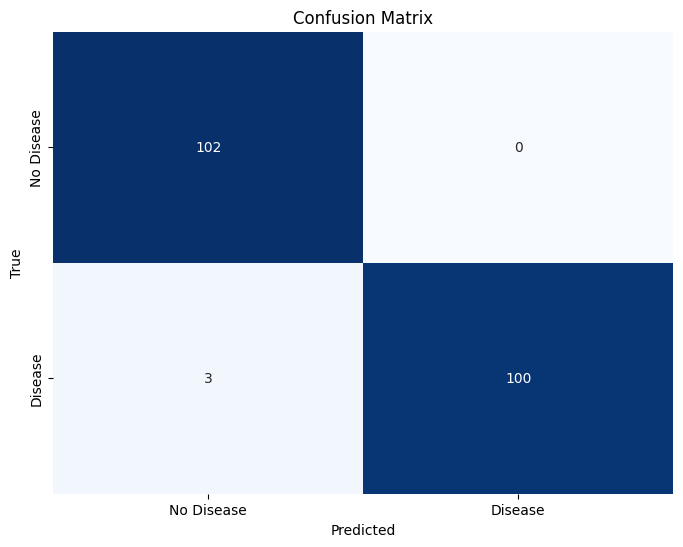

In [22]:
def plot_confusion_matrix(confusion_matrix, labels):
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Plot confusion matrix for SVM
plot_confusion_matrix(svm_confusion, labels=['No Disease', 'Disease'])

# Plot confusion matrix for Random Forest
plot_confusion_matrix(rf_confusion, labels=['No Disease', 'Disease'])

# Plot confusion matrix for Decision Tree
plot_confusion_matrix(dt_confusion, labels=['No Disease', 'Disease'])


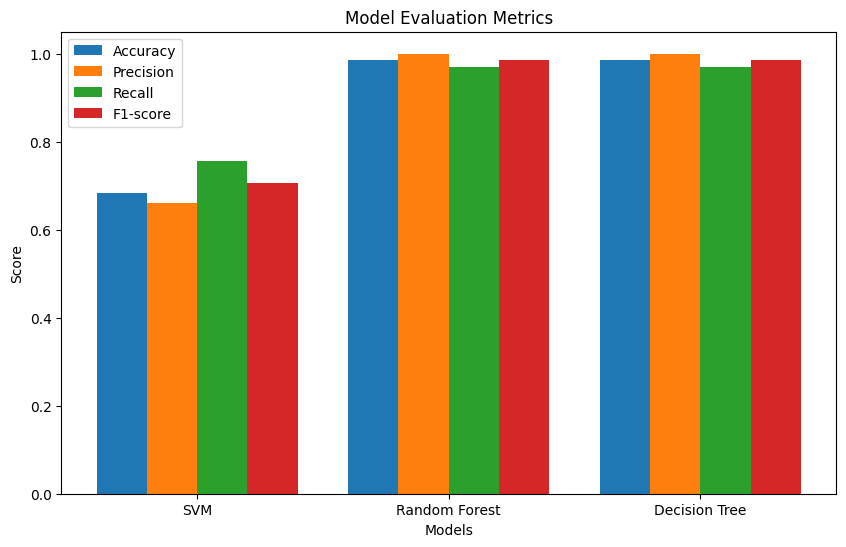

In [25]:
models = ['SVM', 'Random Forest', 'Decision Tree']
accuracy = [svm_accuracy, rf_accuracy, dt_accuracy]
precision = [svm_precision, rf_precision, dt_precision]
recall = [svm_recall, rf_recall, dt_recall]
f1 = [svm_f1, rf_f1, dt_f1]

plt.figure(figsize=(10, 6))
x = np.arange(len(models))
width = 0.2

plt.bar(x - 1.5 * width, accuracy, width, label='Accuracy')
plt.bar(x - 0.5 * width, precision, width, label='Precision')
plt.bar(x + 0.5 * width, recall, width, label='Recall')
plt.bar(x + 1.5 * width, f1, width, label='F1-score')

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Evaluation Metrics')
plt.xticks(x, models)
plt.legend()
plt.show()
